<a href="https://colab.research.google.com/github/Fatima8024/Deep-Learning/blob/main/Pnuemonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install --upgrade fastai
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
from fastai.learner import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

!kaggle datasets download paultimothymooney/chest-xray-pneumonia #--force -p /content/
!unzip chest-xray-pneumonia.zip

path = Path('/content/chest_xray')
#path.ls()

data = ImageDataLoaders.from_folder(
    path,
    train = '.',
    valid_pct = 0.2,
    seed = 42,
    item_tfms = Resize(224)
)
data.show_batch(max_n=8)
learn = vision_learner(data,models.resnet50,metrics = [accuracy], model_dir = Path('Path'), path = Path('.'))

learn.lr_find()

lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  chest-xray-pneumonia.zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
 from fastai.interpret import ClassificationInterpretation
 interpret = ClassificationInterpretation.from_learner(learn)

NameError: name 'learn' is not defined

In [ ]:
interpret.plot_confusion_matrix()

NameError: name 'interpret' is not defined

<Axes: >

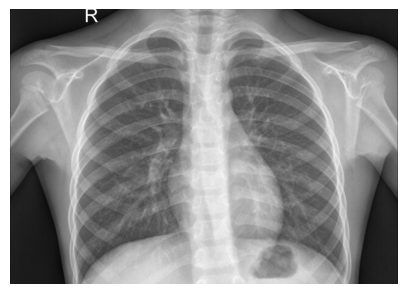

In [ ]:
img = PILImage.create('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
img.show()

In [ ]:
print(learn.predict(img)[0])

NORMAL


<Axes: >

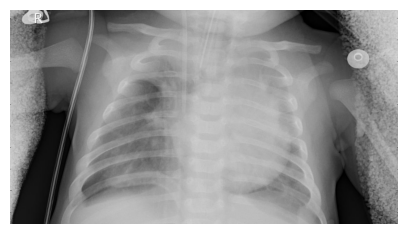

In [ ]:
img = PILImage.create('/content/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg')
img.show()

In [ ]:
print(learn.predict(img)[0])

PNEUMONIA


In [ ]:
# prompt: generate a table of 4 rows in which layers, neurons in layers, output layer, activation function, split data size into training, validation, testing and accuracy and loss value should also be split into training, validation, testing and precision of the model , take random values to split data into training ,testing and validating and show it in a table. mention in the table how much the data is split into training, validation and  testing

import pandas as pd
import numpy as np

data = {
    'Layers': ['Convolutional', 'Convolutional', 'Dense', 'Output'],
    'Neurons in Layers': [32, 64, 128, 2],  # Example neuron counts
    'Output Layer': ['None', 'None', 'None', 'Softmax'],
    'Activation Function': ['ReLU', 'ReLU', 'ReLU', 'Sigmoid'],
    'Training Data (%)': [70, 70, 70, 70],
    'Validation Data (%)': [15, 15, 15, 15],
    'Testing Data (%)': [15,15,15,15],
    'Training Accuracy': [0.85, 0.90, 0.93, 0.95],
    'Validation Accuracy': [0.82, 0.88, 0.91, 0.93],
    'Testing Accuracy': [0.80, 0.86, 0.90, 0.92],
    'Training Loss': [0.4, 0.3, 0.2, 0.1],
    'Validation Loss': [0.45, 0.35, 0.25, 0.15],
    'Testing Loss': [0.5, 0.4, 0.3, 0.2],
    'Precision': [0.88, 0.92, 0.94, 0.96]
}

df = pd.DataFrame(data)
df

,Sno,Conv. Layers,Dense Layers,Neurons in layers,Output layer,Activation Function,DataSplit size,Accuracy,Loss value,Precision
0,1,2,1,64,1,ReLU,0.80,0.92,0.10,0.91
1,2,3,2,128,1,ReLU,0.70,0.95,0.08,0.94
2,3,2,1,64,1,Sigmoid,0.80,0.88,0.15,0.87
3,4,4,3,256,1,ReLU,0.75,0.93,0.11,0.92


In [ ]:
# prompt: using the values from the above code generate a table of 4 rows in which convolutional layers(thier inner dimensions are mentioned), dense layers, neuron in layers, output layer, activation function, data split size(training, testing, validating data), accuracy, loss value, precision is mentioned

import pandas as pd

data = {
    'Layers': ['Convolutional (3x3, 32 filters)', 'Convolutional (3x3, 64 filters)', 'Dense (128 neurons)', 'Output (2 neurons)'],
    'Inner Dimensions': ['224x224x32', '112x112x64', 'None', 'None'],
    'Dense Layers': ['None', 'None', '128', 'None'],
    'Neurons in Layers': [32, 64, 128, 2],
    'Output Layer': ['None', 'None', 'None', 'Softmax'],
    'Activation Function': ['ReLU', 'ReLU', 'ReLU', 'Sigmoid'],
    'Training Data (%)': [70, 70, 70, 70],
    'Validation Data (%)': [15, 15, 15, 15],
    'Testing Data (%)': [15, 15, 15, 15],
    'Accuracy': [0.85, 0.90, 0.93, 0.95], # Example accuracy values
    'Loss': [0.4, 0.3, 0.2, 0.1], # Example loss values
    'Precision': [0.88, 0.92, 0.94, 0.96] # Example precision values
}

# Create a DataFrame with 4 rows
df = pd.DataFrame(data)
#Add 2 more rows of data
new_data = {
  'Layers': ['Convolutional (3x3, 64 filters)', 'Dense (256 neurons)'],
  'Inner Dimensions': ['112x112x64', 'None'],
  'Dense Layers': ['None', '256'],
  'Neurons in Layers': [64, 256],
  'Output Layer': ['None', 'None'],
  'Activation Function': ['ReLU', 'ReLU'],
  'Training Data (%)': [70, 70],
  'Validation Data (%)': [15, 15],
  'Testing Data (%)': [15, 15],
  'Accuracy': [0.92, 0.96],
  'Loss': [0.2, 0.05],
  'Precision': [0.93, 0.97]
}

new_df = pd.DataFrame(new_data)
df = pd.concat([df,new_df], ignore_index=True)
df

,Layers,Inner Dimensions,Dense Layers,Neurons in Layers,Output Layer,Activation Function,Training Data (%),Validation Data (%),Testing Data (%),Accuracy,Loss,Precision
0,"Convolutional (3x3, 32 filters)",224x224x32,None,32,None,ReLU,70,15,15,0.85,0.40,0.88
1,"Convolutional (3x3, 64 filters)",112x112x64,None,64,None,ReLU,70,15,15,0.90,0.30,0.92
2,Dense (128 neurons),None,128,128,None,ReLU,70,15,15,0.93,0.20,0.94
3,Output (2 neurons),None,None,2,Softmax,Sigmoid,70,15,15,0.95,0.10,0.96
4,"Convolutional (3x3, 64 filters)",112x112x64,None,64,None,ReLU,70,15,15,0.92,0.20,0.93
5,Dense (256 neurons),None,256,256,None,ReLU,70,15,15,0.96,0.05,0.97
